# Introduction to Machine Learning

6 november 2018, [slides](https://github.com/gsarti/machine_learning_data_analytics/blob/master/05_intro_medvet/2018_MLDA_slides.pdf) 1-48

## Supervised and Unsupervised Learning


A model which allows to predict an outcome from a given set of categories given in input is called **supervised learning**.

A model which doesn't have any information about the possible subgroups in data and could build those from relationships and structures in data is called **supervised learning**.

Examples:

* **Spam flagging**: _supervised learning_, since we are giving examples of spam mail to make it easier for the system to recognize spam mails.


* **Image understanding**: _supervised learning_, since image categories should be previously defined. Since often images are missing tags or labels, we can infer the label from captions attached to the image.


* **Flight trajectories analysis**: _unsupervised learning_, since we just want to cluster on common patterns and trajectories.


* **Authoring regular expressions**: _none of the above_, since the learning doesn't happen at the beginning, this is an example of **online learning**.


## Terminology

* The variables used to predict or infer a result from data are called **inputs, independent variables, features or attributes**.


* The predicted or inferred variable is called the **output, dependent variable or response**.


* A line inside our dataset is called an **observation, instance or data point**.


* A dataset is formed by **$n$ observations**, which have a value for each of the **$p$ variables**.


* A problem of **binary classification** is made up by two parts: make a **classifier** model which can learn from data, train it and use the model on new observations.

* **Repeatability** denotes a procedure that could be repeated by someone else. **Reproducibility** denotes a procedure that will held the same results if it is repeated by someone else. We ideally want to achieve both when building a learning model.

# Laboratory: Let's know Iris dataset

In [6]:
# Hiding warnings for readability
options(warn=0)

library(ggplot2)
library(dplyr)
library(tidyr)
library(PerformanceAnalytics)

In [7]:
# Get basic information about iris dataset
summary(iris)
#?iris # to get information about lengths being in centimeters
nrow(iris)

# n = 150
# p = 4 + 1
# values of attributes: all values are numerical and continuous
# apparent relations: 
# * For setosa, petal ratio is small and sepal ratio is high
# * For virginica and versicolor, sepal and petal ratio are similar

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width       Species 
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100   Min.   :1  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300   1st Qu.:1  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300   Median :2  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199   Mean   :2  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800   3rd Qu.:3  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500   Max.   :3  

[1] 150

In [8]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1


In [9]:
dr = iris %>% group_by(Species) %>%
summarise(Avg.Sepal.Ratio = mean(Sepal.Length / Sepal.Width),
          Avg.Petal.Ratio = mean(Petal.Length / Petal.Width))
dr %>% gather(ratio, value, -Species)

Species,ratio,value
1,Avg.Sepal.Ratio,1.470188
2,Avg.Sepal.Ratio,2.160402
3,Avg.Sepal.Ratio,2.230453
1,Avg.Petal.Ratio,6.908000
2,Avg.Petal.Ratio,3.242837
3,Avg.Petal.Ratio,2.780662


In [10]:
dl = iris %>% group_by(Species) %>%
summarise(Avg.Sepal.Length = mean(Sepal.Length),
          Avg.Sepal.Width = mean(Sepal.Width),
          Avg.Petal.Length = mean(Petal.Length),
          Avg.Petal.Width = mean(Petal.Width))
dl %>% gather(ratio, value, -Species) %>% arrange(Species) 

Species,ratio,value
1,Avg.Sepal.Length,5.006
1,Avg.Sepal.Width,3.428
1,Avg.Petal.Length,1.462
1,Avg.Petal.Width,0.246
2,Avg.Sepal.Length,5.936
2,Avg.Sepal.Width,2.770
2,Avg.Petal.Length,4.260
2,Avg.Petal.Width,1.326
3,Avg.Sepal.Length,6.588
3,Avg.Sepal.Width,2.974


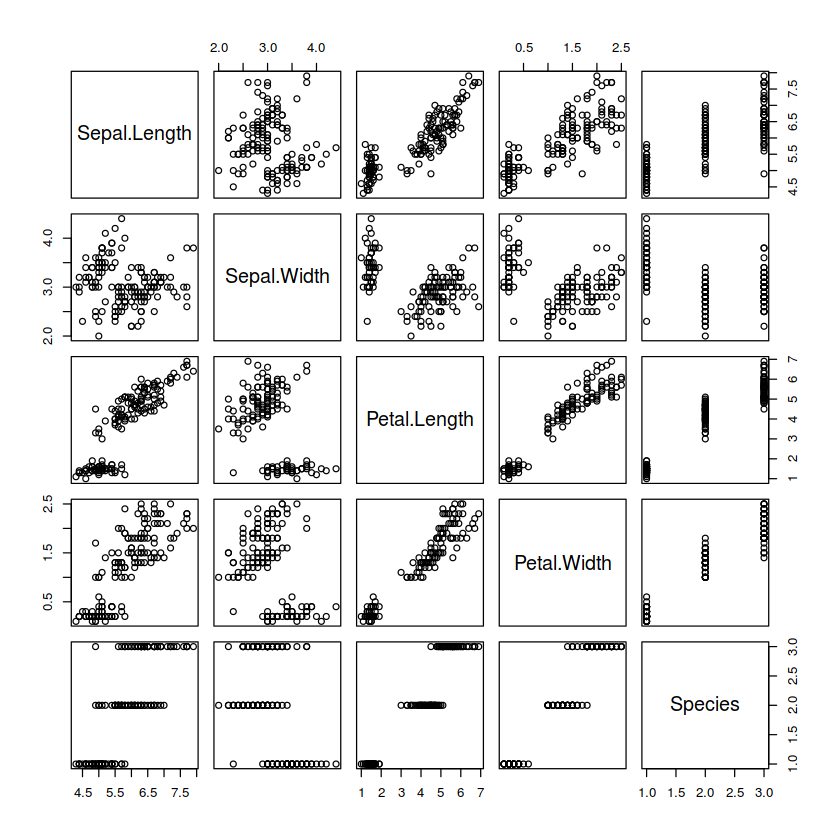

In [11]:
pairs(iris)

In [12]:
iris$Species = as.numeric(iris$Species)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1


In [13]:
cor(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411,0.7825612
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259,-0.4266576
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654,0.9490347
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000,0.9565473
Species,0.7825612,-0.4266576,0.9490347,0.9565473,1.0000000


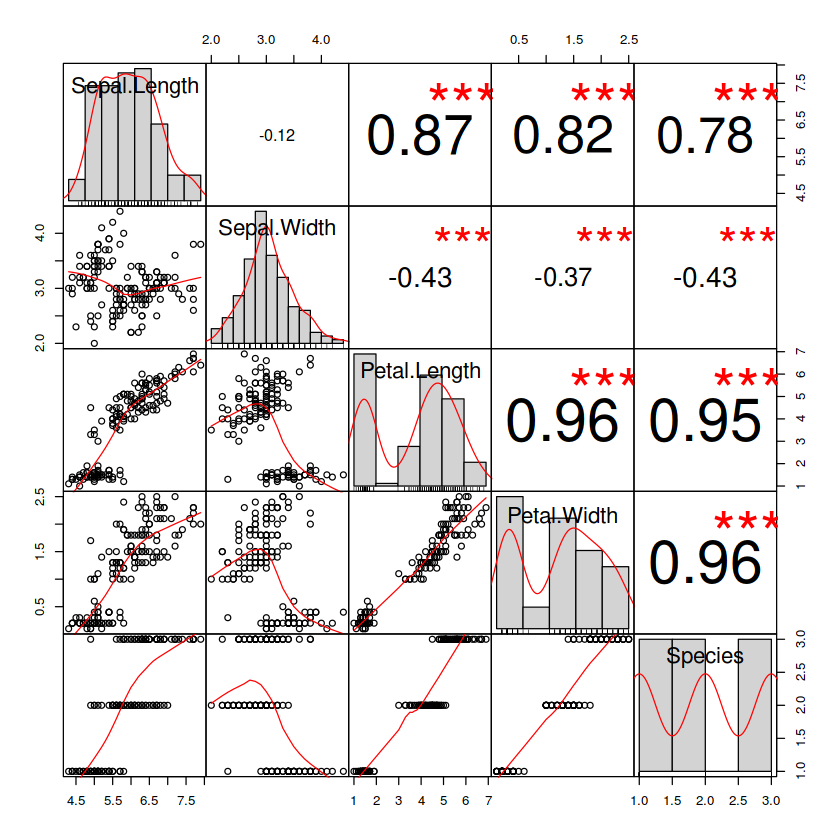

In [14]:
chart.Correlation(iris)

In [15]:
iris_fit = lm(iris$Species ~ iris$Petal.Width + iris$Petal.Length)

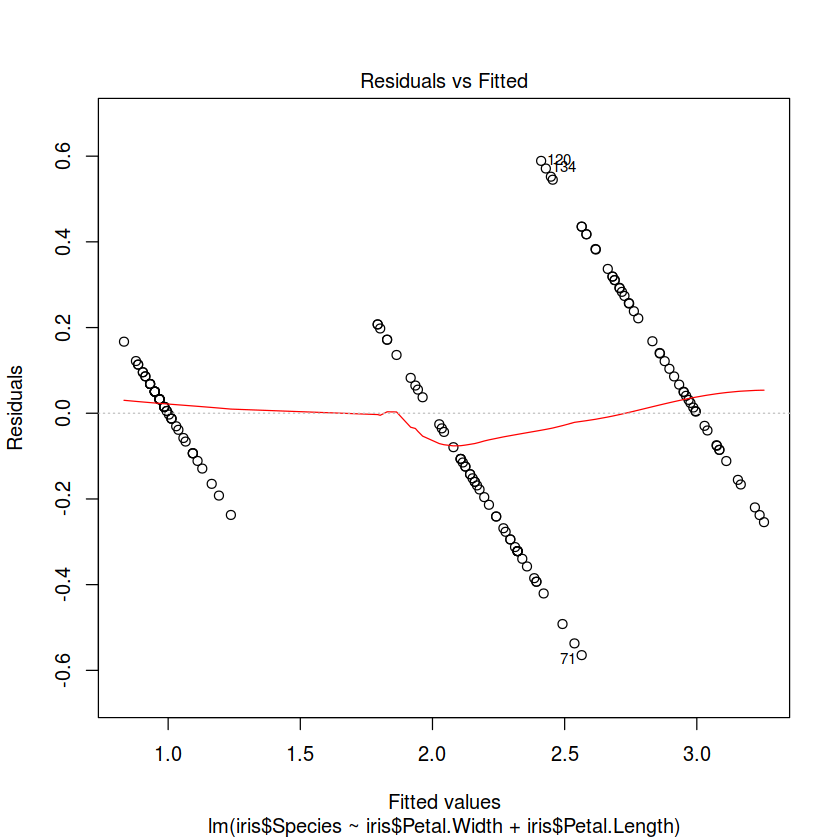

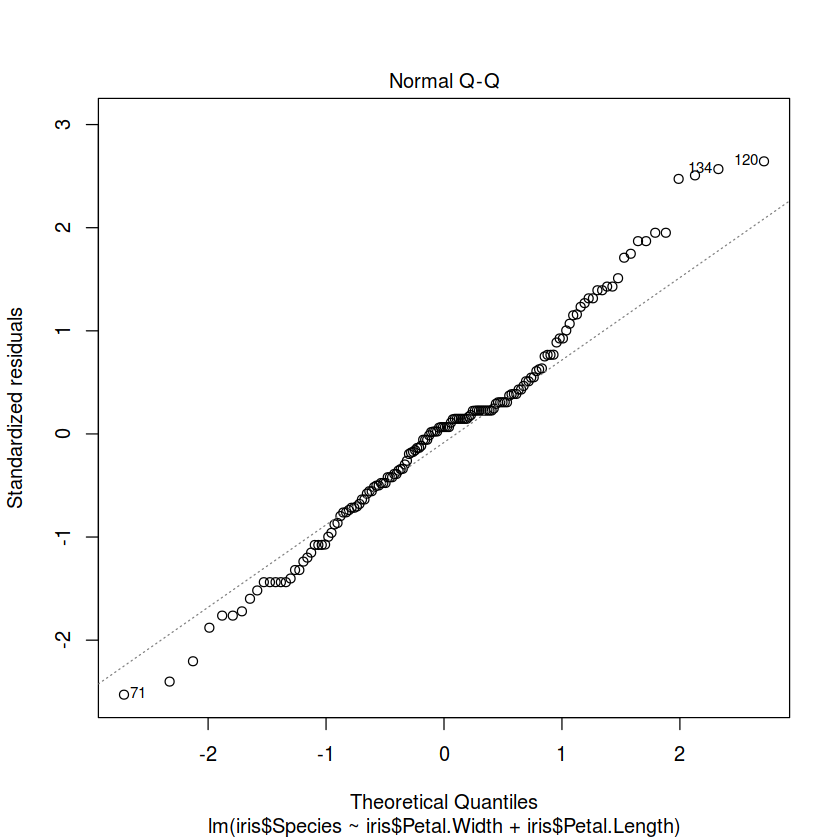

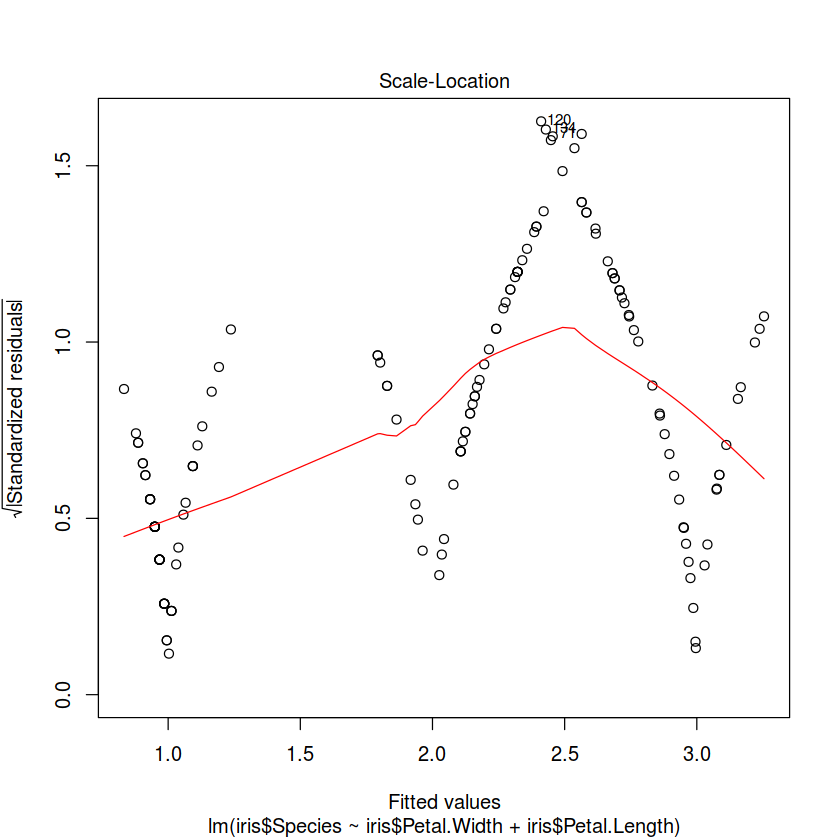

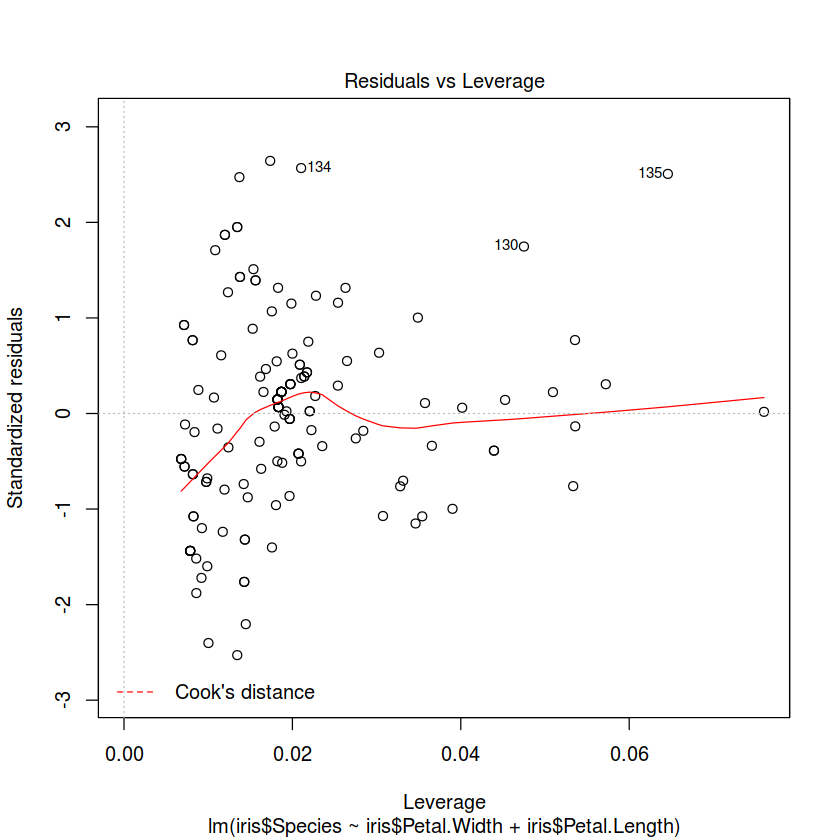

In [16]:
plot(iris_fit)

### Insights on data

* n = 150

* p = 4

* 3 possible classes: setosa, versicolor and virginica.

* values of attributes: all values are numerical and continuous

* apparent relations: 

    * For the setosa specie, `Petal.Ratio` is smaller than the total average and `Sepal.Ratio` is higher than average.
    
    * For species virginica and versicolor, `Sepal.Ratio` and `Petal.Ratio` are similar.
    
    * There is strong correlation between `Petal.Width` and `Petal.Length`, and also between `Sepal.Length` and both `Petal.Width` and `Petal.Length`.
   
* There could be a risk for non-informative data if significant relations between petals, sepals and species weren't present.
    

# Tree-based methods

7 november 2018, slides 49-

A  **decision tree** is a supervised machine learning technique which could be used to predict or infer results based on a series of subsequent steps, which could be inferred from data using a recursive **dividi et impera** approach on both tree branches. In practice, you can only proceed from the root towards the leaves.

A **branch node** is a node in which we have many possible outcomes. A **decision node** is a node in which a decision about the predicted value is taken.

To build a decision tree, we'll need a matrix of features `X` and a vector of outcomes `y`. 

The **termination criterion** of the recursive function is based only on the labels, choosing as predicted y the most common class in y. It produces  a decision node, which is the simplest tree possible.

We select a **branch** characterized by `i` $\in [1, p]$ that specifies the index of the feature and `t` which is the selection criterion. We use those value to split the remaining tree in two and append the result to the one of this function.

This procedure is called **recursive binary splitting**.

The **best branch** function is simply minimizing the error. For example, if by assuming all the values on one side are of the chosen value we made 2 errors over 10 total values, we have that 

$$E(Y) = \frac{|\{y \in Y : y \neq \hat{y}\}}{|Y|} = 0.2$$

$arg min_{i,t} E(y|x_i \geq t) + E(y|x_i < t)$ minimize the classification error in the previous function by considering many split and choosing the one which have the lowest error on both sides of the split.

Best branch is a **greedy algorithm** since it seeks to minimize the errors in the fastest possible way.

The way of computing the pair $(i^{*}, t^{*})$ could be different, especially in computational time. It is possible that multiple pairs minimize the error, in which case the splitting pair could be selected in different ways (randomly, in order, etc.) depending on implementation.

The **termination criterion** is based on a function which returns true if the split y contains only one class, or if the absolute value of y is smaller than a user-provided parameter $k_{min}$. Another possible implementation could take in account another parameter, $d_{max}$, which specified the maximal depth for the tree.

From scientific literature, it has been shown that **classificiation error** $E()$, which is the proportion of labels which are different from the most popular on total labels, is not sufficiently sensitive for tree growing. Other better options, which have the same semantics (high level bad, low level good) are:

* **Gini index**

* **Cross-entropy**

Those indexes are represented by smoother functions, making them easier to be optimized. For a multiclass problem, the essence is the same.

In general, **classification problems have categorical outcomes**, defined as variables with discrete domains, without ordering.

Random trees can mix categorical and numerical variables. In the case of numerical variables, the i is considered as $x_i = c$, while for categorical ones is $x_i \in C' \subset C$ with $c$ being a class. $C'$ is a specific subset (class) of a categorical variable (ex. blonde for variable `hair`)

A problem that could occur is that tree complexity is too high for the problem it is trying to model. This makes it less understandable. and it is a behavior which is likely driven by noise in carousel data. This is called **overfitting** since the system is fitting the data and its errors, while we wanted insights on the underlying context. Overfitting models have **high variance** since the model can vary a lot if learning data varies.

Managing the parameter $k_{min}$ is very important, since it allows the system to prevent overfitting by keeping it high, or to correctly model systems with great complexity by setting it high. Other ways of fighting overfitting for trees are:
* limiting their depth with the $d_{max}$ parameter
* stopping the node creation if splits doesn't decrease the impurity
* use **pruning**

**Pruning** is a practice in which, starting from a full tree, we build a sequence of subtrees which have a decreasing level of complexity. At the end, we choose the model having the lowest classification error with k-folds cross validation.